# Import Libraries

In [107]:
#LSTM for regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import tensorflow as tf
import sklearn
import seaborn as sns
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from numpy import asarray
from sklearn.ensemble import RandomForestRegressor
from pandas import concat
from sklearn.model_selection import train_test_split

# Data Pre-Processing

In [108]:
coffee_data = pd.read_excel('coffee_data.xlsx')
fuel_data = pd.read_excel('fuel_data.xlsx')
tomato_data = pd.read_excel('tomato_data.xls')

In [109]:
tomato_data

,Ngày tháng,Mã mặt hàng,Tên mặt hàng,ĐVT,Giá tại chợ,Giá tại nông hộ
0,2015-02-02,41905,Cà chua thường loại 1,Kg,12000.0,NaN
1,2015-08-21,41905,Cà chua thường loại 1,Kg,15000.0,10000.0
2,2016-02-03,41905,Cà chua thường loại 1,Kg,15000.0,12000.0
3,2016-10-26,41905,Cà chua thường loại 1,Kg,15000.0,0.0
4,2017-01-04,41905,Cà chua thường loại 1,Kg,15000.0,0.0
...,...,...,...,...,...,...
1205,2022-08-05,41905,Cà chua thường loại 1,Kg,20000.0,16000.0
1206,2022-10-19,41905,Cà chua thường loại 1,Kg,20000.0,15000.0
1207,2022-10-26,41905,Cà chua thường loại 1,Kg,20000.0,15000.0
1208,2022-11-02,41905,Cà chua thường loại 1,Kg,25000.0,18000.0


In [110]:
coffee_data

,Tên_mặt_hàng,Đơn_vị_tính,Loại_giá,Loại_tiền,Ngày,Giá
0,Cà phê Robusta nhân xô,VNĐ/kg,Thu mua,VNĐ,2021-01-01,31667.5
1,Cà phê Robusta nhân xô,Vnđ/kg,Thu mua,VNĐ,2021-01-04,32717.0
2,Cà phê Robusta nhân xô,Vnđ/kg,Thu mua,VNĐ,2021-01-05,32417.0
3,Cà phê Robusta nhân xô,Vnđ/kg,Thu mua,VNĐ,2021-01-06,32317.0
4,Cà phê Robusta nhân xô,Vnđ/kg,Thu mua,VNĐ,2021-01-07,32117.0
...,...,...,...,...,...,...
619,Cà phê Robusta nhân xô,Vnđ/kg,Thu mua,VNĐ,2023-05-15,55566.5
620,Cà phê Robusta nhân xô,Vnđ/kg,Thu mua,VNĐ,2023-05-16,56066.5
621,Cà phê Robusta nhân xô,Vnđ/kg,Thu mua,VNĐ,2023-05-17,56666.5
622,Cà phê Robusta nhân xô,Vnđ/kg,Thu mua,VNĐ,2023-05-18,57000.0


In [111]:
fuel_data

,Giá nhiên liệu,Xăng RON 95 1 lít,Xăng E5 RON 92 1 lít,Dầu Diesel 1 lít,Dầu Hỏa 1 lít
0,12.06.2023,22.01,20.87,18.02,17.82
1,01.06.2023,22.01,20.87,17.94,17.77
2,22.05.2023,21.49,20.48,17.95,17.96
3,11.05.2023,21.00,20.13,17.65,17.97
4,04.05.2023,22.32,21.43,18.25,18.52
...,...,...,...,...,...
114,02.03.2019,18.54,17.21,15.86,14.88
115,15.02.2019,17.60,16.27,14.90,14.18
116,31.01.2019,17.60,16.27,14.90,14.18
117,16.01.2019,17.60,16.27,14.90,14.18


In [112]:
coffee_data['Ngày'] = pd.to_datetime(coffee_data['Ngày'])
coffee_data.drop(coffee_data.columns[[0, 1, 2, 3]], axis=1, inplace=True)
coffee_data

,Ngày,Giá
0,2021-01-01,31667.5
1,2021-01-04,32717.0
2,2021-01-05,32417.0
3,2021-01-06,32317.0
4,2021-01-07,32117.0
...,...,...
619,2023-05-15,55566.5
620,2023-05-16,56066.5
621,2023-05-17,56666.5
622,2023-05-18,57000.0


In [114]:
tomato_data['Ngày'] = pd.to_datetime(tomato_data['Ngày tháng'])
tomato_data.drop(tomato_data.columns[[0, 1, 2, 3, 5]], axis=1, inplace=True)
tomato_data

,Giá tại chợ,Ngày
0,12000.0,2015-02-02
1,15000.0,2015-08-21
2,15000.0,2016-02-03
3,15000.0,2016-10-26
4,15000.0,2017-01-04
...,...,...
1205,20000.0,2022-08-05
1206,20000.0,2022-10-19
1207,20000.0,2022-10-26
1208,25000.0,2022-11-02


In [115]:
fuel_data["Ngày"] = pd.to_datetime(fuel_data["Giá nhiên liệu"])
fuel_data.drop(fuel_data.columns[[0,1,2,4]], axis='columns', inplace=True)
fuel_data

,Dầu Diesel 1 lít,Ngày
0,18.02,2023-12-06
1,17.94,2023-01-06
2,17.95,2023-05-22
3,17.65,2023-11-05
4,18.25,2023-04-05
...,...,...
114,15.86,2019-02-03
115,14.90,2019-02-15
116,14.90,2019-01-31
117,14.90,2019-01-16


In [116]:
fuel_data = fuel_data[::-1]

In [117]:
fuel_data

,Dầu Diesel 1 lít,Ngày
118,14.90,2019-01-01
117,14.90,2019-01-16
116,14.90,2019-01-31
115,14.90,2019-02-15
114,15.86,2019-02-03
...,...,...
4,18.25,2023-04-05
3,17.65,2023-11-05
2,17.95,2023-05-22
1,17.94,2023-01-06


In [118]:
# # # daterng_all = pd.date_range(start=fuel_data['Ngày'].iloc[-1], end=fuel_data['Ngày'].iloc[0], freq="1D")
# fuel_data = fuel_data.set_index('Ngày').resample('D').ffill().reset_index()

In [119]:
# Merge the dataframes with an outer join
merged_df = pd.merge(coffee_data, fuel_data, left_on='Ngày', right_on='Ngày', how="outer")

# Fill missing dates from both datasets with each other
merged_df.fillna(method='bfill', inplace=True)
# merged_df['Giá'].fillna(method='ffill', inplace=True)

# Drop one of the duplicated date columns
# merged_df.drop('Ngày', axis=1, inplace=True)

In [120]:
# data = pd.merge(coffee_data, fuel_data, on = 'Ngày', how = "left")
# data['Dầu Diesel 1 lít'].interpolate(method='nearest')

In [121]:
merged_df

,Ngày,Giá,Dầu Diesel 1 lít
0,2021-01-01,31667.5,13.04
1,2021-01-04,32717.0,13.04
2,2021-01-05,32417.0,13.04
3,2021-01-06,32317.0,13.04
4,2021-01-07,32117.0,13.04
...,...,...,...
687,2023-03-04,NaN,19.43
688,2023-11-04,NaN,20.14
689,2023-11-05,NaN,17.65
690,2023-05-22,NaN,17.95


In [103]:
merged_df.dropna()

,Ngày,Giá,Dầu Diesel 1 lít
0,2021-01-01,31667.5,13.04
1,2021-01-04,32717.0,13.04
2,2021-01-05,32417.0,13.04
3,2021-01-06,32317.0,13.04
4,2021-01-07,32117.0,13.04
...,...,...,...
619,2023-05-15,55566.5,14.90
620,2023-05-16,56066.5,14.90
621,2023-05-17,56666.5,14.90
622,2023-05-18,57000.0,14.90


In [122]:
data = pd.merge(merged_df, tomato_data, left_on='Ngày', right_on='Ngày', how = "outer")

In [123]:
data

,Ngày,Giá,Dầu Diesel 1 lít,Giá tại chợ
0,2021-01-01,31667.5,13.04,NaN
1,2021-01-04,32717.0,13.04,15000.0
2,2021-01-05,32417.0,13.04,NaN
3,2021-01-06,32317.0,13.04,15000.0
4,2021-01-07,32117.0,13.04,NaN
...,...,...,...,...
1542,2020-03-02,NaN,NaN,15000.0
1543,2020-03-09,NaN,NaN,15000.0
1544,2020-06-10,NaN,NaN,15000.0
1545,2020-08-31,NaN,NaN,15000.0


In [43]:
data['Giá'].astype(float)
data['Dầu Diesel 1 lít'].astype(float)

0      12.37
1      12.37
2      12.37
3      12.37
4      12.37
       ...  
619    19.39
620    19.39
621    19.39
622    19.39
623    19.39
Name: Dầu Diesel 1 lít, Length: 624, dtype: float64

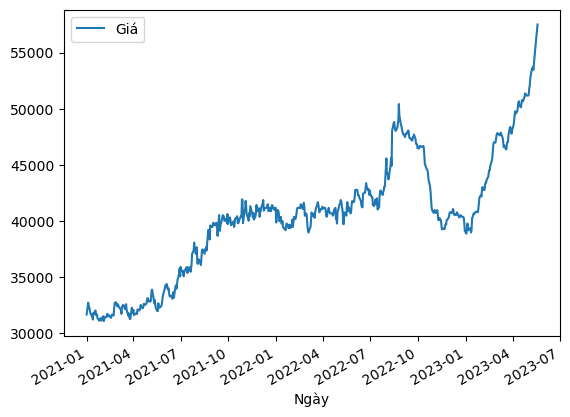

In [44]:
data.plot(x = 'Ngày', y = 'Giá')
plt.show()

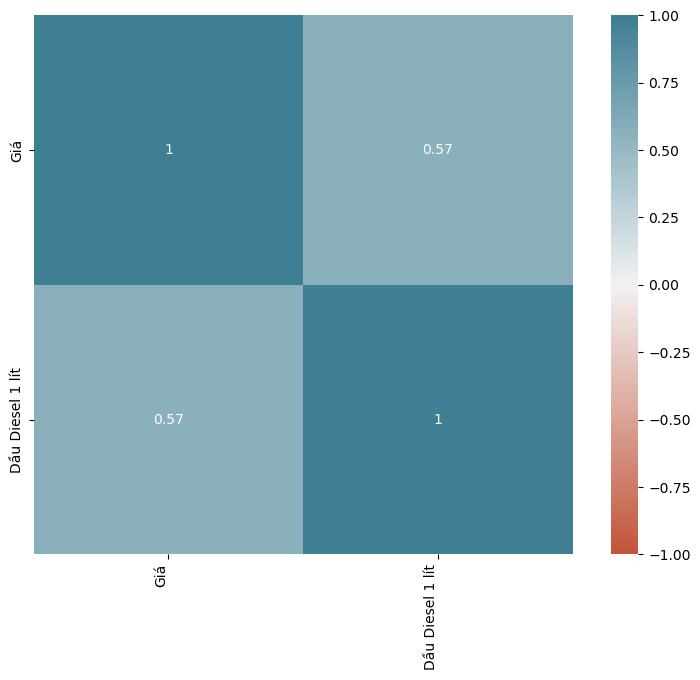

In [48]:
# Use heatmap to identify correlation between variables
f, ax = plt.subplots(figsize = (10, 7))
corr = data.corr()
ax = sns.heatmap(
    corr, vmin = -1, vmax = 1, center = 0, annot = True,
    cmap = sns.diverging_palette(20, 220, n = 200),
    square = True
)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment = 'right');

In [8]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [9]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(coffee_data.values)

In [10]:
def mean_absolute_scaled_error(y_true, y_pred, y_train):
    e_t = y_true - y_pred
    scale = sklearn.metrics.mean_absolute_error(y_train[1:], y_train[:-1])
    return np.mean(np.abs(e_t / scale))

In [11]:
# calculate metrics
def print_metrics(test, pre_test):
    
    print('\nRMSE')
    testScore = np.sqrt(mean_squared_error(test,pre_test))
    print('Test Score: %.2f RMSE' % (testScore))
    
    print('\nMAE')
    testScore = sklearn.metrics.mean_absolute_error(test, pre_test)
    print('Test Score: %.2f MAE' % (testScore))
    
    print('\nMAPE')                          
    testScore = sklearn.metrics.mean_absolute_percentage_error(test, pre_test)
    print('Test Score: %.2f MAPE' % (testScore))
    
    print('\nMASE')
    testScore = mean_absolute_scaled_error(test, pre_test, test)
    print('Test Score: %.2f MASE' % (testScore))

# LSTM

In [12]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

436 188


In [13]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [14]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [15]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [16]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(434, 1, 1)
(434,)
(186, 1, 1)
(186,)


In [17]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
434/434 - 1s - loss: 0.0220 - 1s/epoch - 3ms/step
Epoch 2/100
434/434 - 0s - loss: 0.0065 - 358ms/epoch - 824us/step
Epoch 3/100
434/434 - 1s - loss: 0.0020 - 1s/epoch - 2ms/step
Epoch 4/100
434/434 - 1s - loss: 5.7912e-04 - 1s/epoch - 2ms/step
Epoch 5/100
434/434 - 1s - loss: 4.3586e-04 - 821ms/epoch - 2ms/step
Epoch 6/100
434/434 - 1s - loss: 4.3808e-04 - 751ms/epoch - 2ms/step
Epoch 7/100
434/434 - 1s - loss: 4.1856e-04 - 829ms/epoch - 2ms/step
Epoch 8/100
434/434 - 1s - loss: 4.1434e-04 - 678ms/epoch - 2ms/step
Epoch 9/100
434/434 - 1s - loss: 4.3210e-04 - 593ms/epoch - 1ms/step
Epoch 10/100
434/434 - 1s - loss: 4.2607e-04 - 1s/epoch - 2ms/step
Epoch 11/100
434/434 - 1s - loss: 4.1072e-04 - 1s/epoch - 2ms/step
Epoch 12/100
434/434 - 1s - loss: 4.1753e-04 - 1s/epoch - 2ms/step
Epoch 13/100
434/434 - 1s - loss: 4.0664e-04 - 974ms/epoch - 2ms/step
Epoch 14/100
434/434 - 1s - loss: 4.0981e-04 - 755ms/epoch - 2ms/step
Epoch 15/100
434/434 - 1s - loss: 4.0630e-04 - 671ms/epoc

In [18]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

6/6 [==============================] - 0s 3ms/step


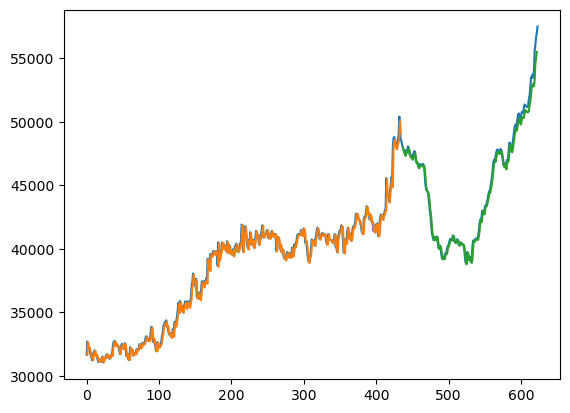

In [31]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Random Forest

In [21]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = data
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

In [22]:
# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
    # transform list into array
    train = asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # fit model
    model = RandomForestRegressor(n_estimators=1000)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict([testX])
    return yhat[0]

In [23]:
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, test_size = n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # split test row into input and output columns
        testX, testy = test[i, :-1], test[i, -1]
        # fit model on history and make a prediction
        yhat = random_forest_forecast(history, testX)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    return test[:, 1], predictions

In [24]:
data = series_to_supervised(dataframe, n_in=1)

In [25]:
y, predict = walk_forward_validation(data, 0.3)

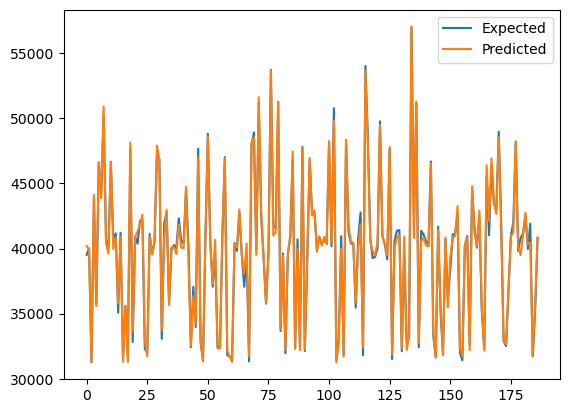

In [28]:
# plot expected vs predicted
plt.plot(y, label='Expected')
plt.plot(predict, label='Predicted')
plt.legend()
plt.show()

In [26]:
print_metrics(y, predict)


RMSE
Test Score: 455.71 RMSE

MAE
Test Score: 341.28 MAE

MAPE
Test Score: 0.01 MAPE

MASE
Test Score: 0.06 MASE


In [29]:
print_metrics(testY[0], testPredict[:,0])


RMSE
Test Score: 478.54 RMSE

MAE
Test Score: 342.12 MAE

MAPE
Test Score: 0.01 MAPE

MASE
Test Score: 1.35 MASE
